In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

index = ['sales','returns','credit fees','rebates','late charges','shipping']
data = {'amount': [350000,-30000,-7500,-25000,95000,-7000]}
trans = pd.DataFrame(data=data,index=index)

from IPython.display import display
display(trans)
display(trans.amount.cumsum())
# Shift data one position right as in cumulative starting value is 0
blank=trans.amount.cumsum().shift(1).fillna(0)
display(blank)

total=trans.sum().amount
trans.loc["net"]=total
blank.loc["net"]=total

display(trans)
display(blank)

# Create the steps
step=blank.reset_index(drop=True).repeat(3).shift(-1)
step[1::3]=np.nan
display(step)
blank.loc["net"] = 0

,amount
sales,350000
returns,-30000
credit fees,-7500
rebates,-25000
late charges,95000
shipping,-7000


sales           350000
returns         320000
credit fees     312500
rebates         287500
late charges    382500
shipping        375500
Name: amount, dtype: int64

sales                0.0
returns         350000.0
credit fees     320000.0
rebates         312500.0
late charges    287500.0
shipping        382500.0
Name: amount, dtype: float64

,amount
sales,350000
returns,-30000
credit fees,-7500
rebates,-25000
late charges,95000
shipping,-7000
net,375500


sales                0.0
returns         350000.0
credit fees     320000.0
rebates         312500.0
late charges    287500.0
shipping        382500.0
net             375500.0
Name: amount, dtype: float64

0         0.0
0         NaN
0    350000.0
1    350000.0
1         NaN
1    320000.0
2    320000.0
2         NaN
2    312500.0
3    312500.0
3         NaN
3    287500.0
4    287500.0
4         NaN
4    382500.0
5    382500.0
5         NaN
5    375500.0
6    375500.0
6         NaN
6         NaN
Name: amount, dtype: float64

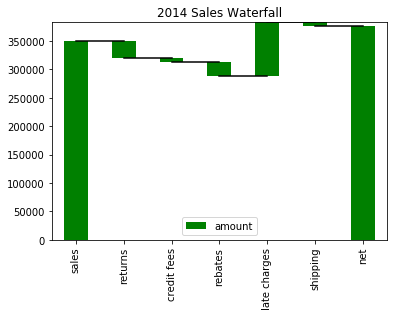

In [2]:
my_plot = trans.plot(kind='bar',stacked=True,bottom=blank, title="2014 Sales Waterfall",color=['g'])
my_plot.plot(step.index,step.values,'k')

(0, 407533.0)

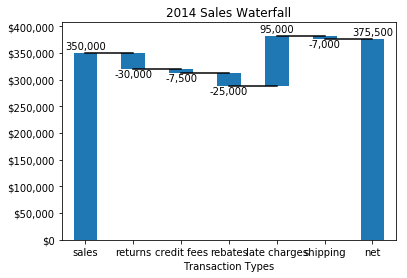

In [11]:
def money(x, pos):
    'The two args are the value and tick position'
    return "${:,.0f}".format(x)
from matplotlib.ticker import FuncFormatter
formatter = FuncFormatter(money)

my_plot = trans.plot(kind='bar', stacked=True, bottom=blank,legend=None, title="2014 Sales Waterfall")
my_plot.plot(step.index, step.values,'k')
my_plot.set_xlabel("Transaction Types")
my_plot.yaxis.set_major_formatter(formatter)
my_plot.set_xticklabels(trans.index,rotation=0)

y_height = trans.amount.cumsum().shift(1).fillna(0)
max = trans.max()
neg_offset = max / 25
pos_offset = max / 50
plot_offset = int(max / 15)

loop = 0
for index, row in trans.iterrows():
    # For the last item in the list, we don't want to double count
    if row['amount'] == total:
        y = y_height[loop]
    else:
        y = y_height[loop] + row['amount']
    # Determine if we want a neg or pos offset
    if row['amount'] > 0:
        y += pos_offset
    else:
        y -= neg_offset
    my_plot.annotate("{:,.0f}".format(row['amount']),(loop,y),ha="center")
    loop+=1
my_plot.set_ylim(0,blank.max()+int(plot_offset))